### Image To Image Translation Model

In [ ]:
import matplotlib.pyplot  as plt
import torch

from torchvision import transforms
from PIL         import Image

### Project path in Google Colab

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount("/content/drive", force_remount=True)

# Set the project path in the drive
PROJECT_PATH = '/content/drive/My Drive/Research Hub/Projects/Present Projects/{Deep Hadad}/Implementation/DeepHadadProject/'

### Local Project path

In [2]:
PROJECT_PATH = './'

In [3]:
import sys
sys.path.append(PROJECT_PATH)

import core.networks as dh_networks

### Constants

In [47]:
MODEL_PATH        = PROJECT_PATH + 'models/'

# Model name
MODEL_NAME = 'model_epoch_60.pth'

# Load and transform the broken image
#test_image_path = PROJECT_PATH + "data/test_dataset/X/KAI_214_x_d_m_2.png"
test_image = PROJECT_PATH + "d_m_test_5.png"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Generating a restored image from a broken one

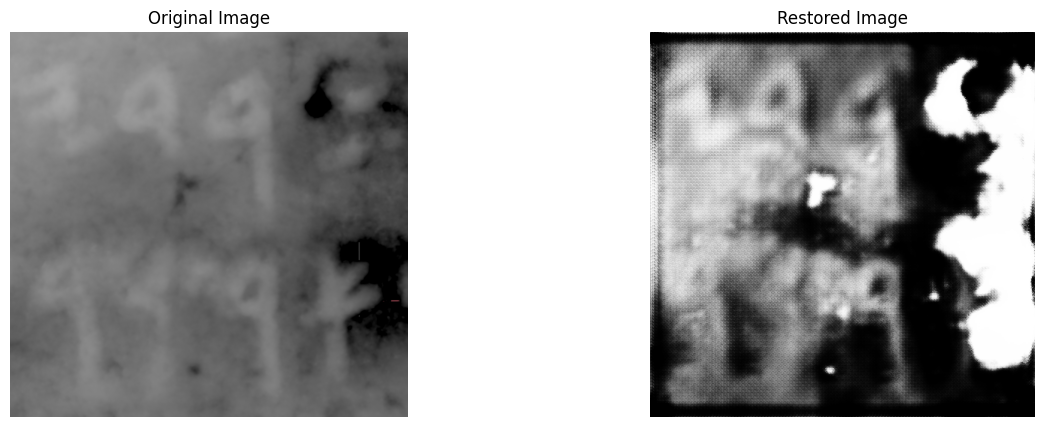

In [48]:

gen_in_channels  = 1  # grayscale images, 3 for RGB images
gen_out_channels = 1  # to generate grayscale restored images, change as needed

# Instantiate the generator with the specified channel configurations
generator = dh_networks.DHadadGenerator(gen_in_channels, gen_out_channels).to(device)

# Load the pre-trained weights
checkpoint = torch.load(MODEL_PATH + MODEL_NAME, map_location=device)

# Load the pre-trained weights
generator.load_state_dict(checkpoint)

# Set the model to evaluation mode
generator.eval()

transform = transforms.Compose([
  transforms.Resize((512, 512)),
  transforms.Lambda(lambda x: x.convert('L')),
  transforms.ToTensor(),
])

# Load the image
test_image_pil = Image.open(test_image_path)

# Transform the image
test_image_tensor = transform(test_image_pil).to(device)

# Turn off gradients for testing
with torch.no_grad():
    # Add a batch dimension and move to the GPU if needed
    broken_image = test_image_tensor.unsqueeze(0).to(device)

    # Generate the restored image and remove the batch dimension
    restored_image = generator(broken_image).squeeze(0).cpu()

# Invert the pixel values
restored_image = restored_image

# Normalize the image to the range [0, 1]
#restored_image = (restored_image - restored_image.min()) / (restored_image.max() - restored_image.min())

# Convert the tensor to a PIL Image and show/save it
restored_image_pil = transforms.ToPILImage()(restored_image)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Show original image
axes[0].imshow(test_image_pil, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Show restored image
axes[1].imshow(restored_image_pil, cmap='gray')
axes[1].set_title('Restored Image')
axes[1].axis('off')

plt.show()

restored_image_pil.save(PROJECT_PATH + "data/test_dataset/R_image.png")
